In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from time import time
import pandas as pd
from sklearn.datasets import make_circles
from scipy.sparse import dok_array
from scipy.spatial import Delaunay, ConvexHull
from scipy.optimize import lsq_linear, nnls
import random

In [2]:
dim = 2
n_samples = 10000
noise = 0.1
size = 500
al = 0.1 #DO NOT USE 0.5; DIFFERENT POINTS MAY LAND ON THE SAME SPOT!!!
errw = 0
it = 1
rep = 0
lb = 0
ub = 1
binary = False
threshold = 0.5

In [3]:
random.seed(0)
circles, labels = make_circles(n_samples=n_samples, noise=noise, random_state=0)

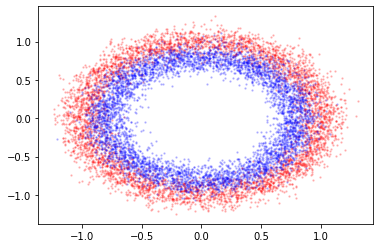

In [4]:
class0 =  (labels == 0)
class1 =  (labels == 1)
fig1 = plt.figure()
ax1 = fig1.add_subplot()
ax1.scatter(circles[class0,0],circles[class0,1],s=2,color = "red",alpha=0.2)
ax1.scatter(circles[class1,0],circles[class1,1],s=2,color = "blue",alpha=0.2)

[False  True  True ...  True False  True]


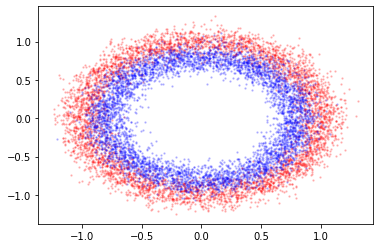

In [38]:
data_aux = []
for i in range(len(labels)):
    data_aux.append([circles[i][0], circles[i][1]])
    data_aux[i].append(labels[i])
data = np.array(data_aux)
color0 = (data[:,dim] == 0)
color1 = (data[:,dim] == 1)
print(color0)
fig1 = plt.figure()
ax1 = fig1.add_subplot()
ax1.scatter(data[color0][:,0],data[color0][:,1],s=2,color = 'r',alpha=0.2)
ax1.scatter(data[color1][:,0],data[color1][:,1],s=2,color = 'b',alpha=0.2)

# As Franco

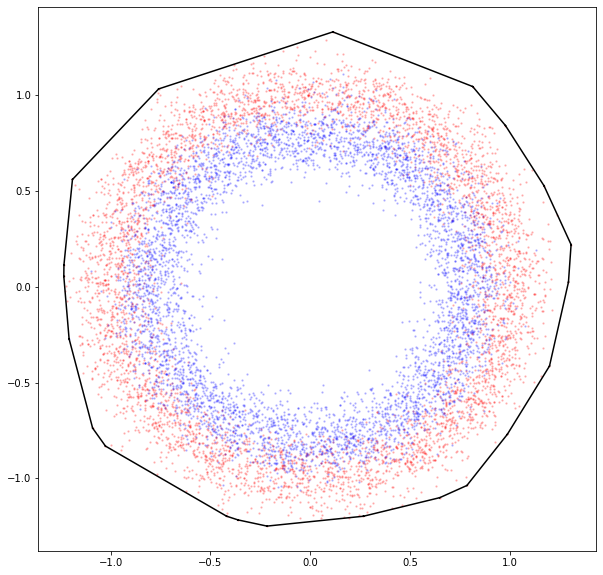

In [6]:
hull = ConvexHull(data[:,0:dim])
edges = np.zeros((hull.simplices.shape[0],3),dtype = int)
edges[:,[0,1]] = hull.simplices;
edges[:,2] = hull.simplices[:,1];
fig2 = plt.figure(figsize=(10,10))
ax1 = fig2.add_subplot()
ax1.scatter(data[color0][:,0],data[color0][:,1],s=2,color = 'r',alpha=0.2)
ax1.scatter(data[color1][:,0],data[color1][:,1],s=2,color = 'b',alpha=0.2)
ax1.triplot(data[:,0],data[:,1],edges,color = "black")


In [7]:
size = 100
n_hull = hull.simplices.shape[0];
m = size - n_hull
int_ind = random.sample(population = list(range(n_samples)), k = m)
bnd_ind = hull.vertices
sample = np.concatenate((bnd_ind, int_ind))
sample

array([6458, 7036, 5413, 4912, 7352, 6693, 6414, 6721, 7779, 4935, 6091,
       8984, 3028, 2234, 4802, 3548, 1017, 2522, 4172, 4215, 2716, 6311,
       6890,  663, 4242, 8376, 7961, 6634, 4969, 7808, 5866, 9558, 3578,
       8268, 2281, 4617, 2289, 1553, 4104, 8725, 9861, 2407, 5081, 1618,
       1208, 5409, 7735, 9171, 1649, 5796, 7113, 5180, 3350, 9052, 7815,
       7253, 8541, 4267, 1020, 8989,  230, 1528, 6534,   18, 8086, 5458,
       3996, 5328, 1031, 3130, 9298, 3632, 3909, 2334, 8896, 7339, 1494,
       1318, 5243, 8322, 8016, 1786, 4938, 9031, 4769, 2044, 8969, 5451,
       8852, 3329, 9882, 8965, 9627, 4712, 7290, 1501, 9769, 6306, 5194,
       9431])

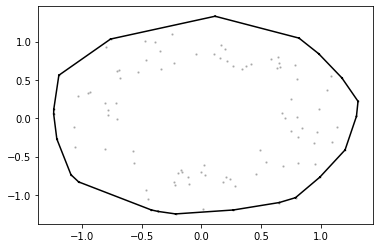

In [8]:
fig3 = plt.figure()
ax1 = fig3.add_subplot()
ax1.scatter(data[sample][:,0],data[sample][:,1],s=2,color = "black",alpha=0.2)
ax1.triplot(data[:,0],data[:,1],edges,color = "black")

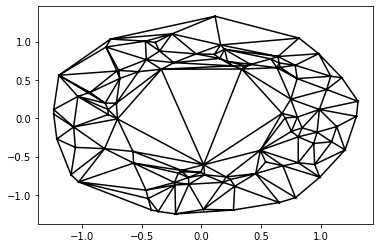

In [9]:
tri = Delaunay(data[sample][:,0:dim])
fig3 = plt.figure()
ax1 = fig3.add_subplot()
ax1.scatter(data[sample][:,0],data[sample][:,1],s=2,color = "black",alpha=0.2)
ax1.triplot(data[sample][:,0],data[sample][:,1],tri.simplices,color = "black")

In [10]:
def bar_coord(points, samples,simp):
    """ modified """

    s = simp.find_simplex(samples)
    b0 = (simp.transform[s, :points.shape[1]].transpose([1, 0, 2]) *
          (samples - simp.transform[s, points.shape[1]])).sum(axis=2).T
    coord = np.c_[b0, 1 - b0.sum(axis=1)]

    return coord,s

(baricentric,s) = bar_coord(data[sample][:,0:dim],data[:,0:dim],tri)
triangs = tri.simplices[s,:]
A = dok_array((n_samples,size), dtype=np.float32)
for i in range(n_samples):
    A[i,triangs[i,:]] = baricentric[i,:]
sol = lsq_linear(A,labels,bounds=(0,1),lsq_solver='lsmr')
labels_sample = np.round(sol.x,2)
labels_1 = (labels_sample >= 0.5)
labels_0 = (labels_sample < 0.5)

In [130]:
tri.vertices[174]

array([43, 99, 42], dtype=int32)

In [144]:
sum(B-labels)

0.0

In [60]:
print(baricentric)

[[0.30651462 0.43974525 0.25374013]
 [0.25969538 0.45074904 0.28955559]
 [0.52201566 0.35806883 0.11991551]
 ...
 [0.21891517 0.75134357 0.02974127]
 [0.26459741 0.63873335 0.09666924]
 [0.79336044 0.13231214 0.07432742]]


In [30]:
sample

array([6458, 7036, 5413, 4912, 7352, 6693, 6414, 6721, 7779, 4935, 6091,
       8984, 3028, 2234, 4802, 3548, 1017, 2522, 4172, 4215, 2716, 1179,
       4932, 5739, 7144, 2954, 1000, 8251, 7653,  645, 9772, 1653, 6410,
       3266, 4262, 5874, 7704, 9335, 2775, 3332,  951, 2592, 2653, 5608,
       8674, 4107, 1920, 9777, 7246, 2864,  216, 7727, 6715, 9324, 8332,
       5102, 5851, 6367, 4111, 2513, 9184,  203, 7503, 1295, 5503,  748,
       8918, 4601, 2209, 3934, 7894, 5770, 9996, 4716, 5885, 9671, 2168,
       5083, 6357, 6789, 1322,   24, 9741, 3150, 5478, 2622, 3922, 3655,
       7342, 6203, 9308,  516, 6590, 9297, 6852,  766, 2714, 7296, 1046,
       4247])

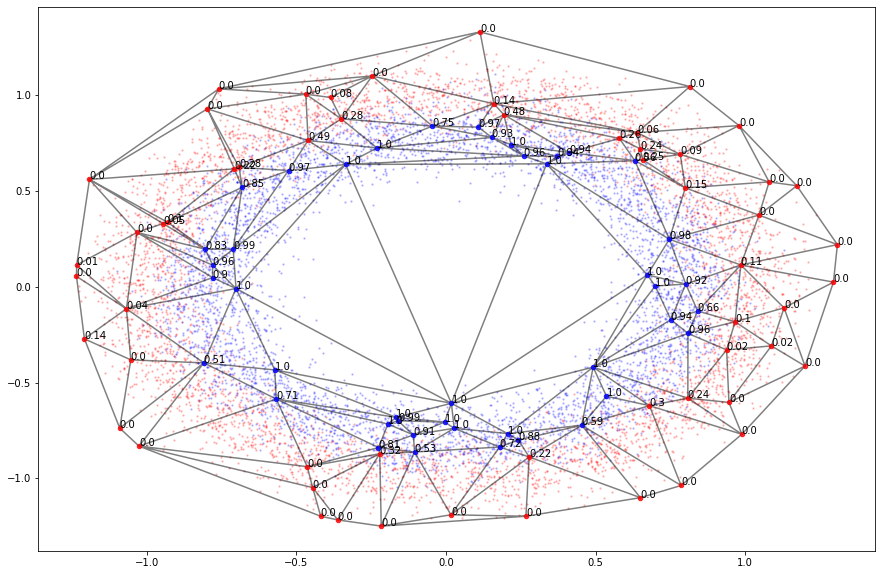

In [11]:
fig5 = plt.figure(figsize=(15,10))
ax1 = fig5.add_subplot()
ax1.scatter(data[class0][:,0],data[class0][:,1],s=2,color = "red",alpha=0.2)
ax1.scatter(data[class1][:,0],data[class1][:,1],s=2,color = "blue",alpha=0.2)
ax1.triplot(data[sample][:,0],data[sample][:,1],tri.simplices,color = "black",alpha = 0.5)

ax1.scatter(data[sample,0][labels_0],data[sample,1][labels_0],s=20,color = "red",alpha=0.8)
ax1.scatter(data[sample,0][labels_1],data[sample,1][labels_1],s=20,color = "blue",alpha=0.8)

text_to_plot = list(map(str,labels_sample))
for j,txt in enumerate(text_to_plot):
    ax1.text(data[sample,0][j],data[sample,1][j], s = txt )

# As me

In [15]:
hull = ConvexHull(data[:,0:dim])
hull = list(hull.vertices)
in_hull_data = [list(data[i]) for i in hull]
L = len(in_hull_data)
in_hull = [int(i) for i in range(L)]
out_hull_data = np.array([data[i] for i in range(len(data)) if i not in hull])
new_data = np.array(np.concatenate([in_hull_data,out_hull_data]))
length = len(new_data)
sample = random.sample([int(i) for i in range(L,length)],max(0,size-L))
sample = np.concatenate([in_hull,sample])
sample.sort()
sample = np.array([int(i) for i in sample])
rem = np.array([int(i) for i in range(length) if int(i) not in sample])
if size>L:
    out_hull = list(range(L,size))
else:
    out_hull = []

In [32]:
hull = ConvexHull(data[:,0:dim])
hull = list(hull.vertices)
in_hull_data = [list(data[i]) for i in hull]
L = len(in_hull_data)
in_hull = [int(i) for i in range(L)]
out_hull_data = np.array([data[i] for i in range(len(data)) if i not in hull])
new_data = np.array(np.concatenate([in_hull_data,out_hull_data]))

In [18]:
rem = np.array([int(i) for i in range(len(data)) if int(i) not in sample])
rem

array([   0,    1,    2, ..., 9997, 9998, 9999])

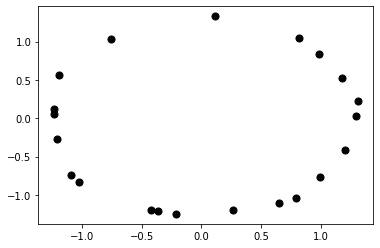

In [16]:
plt.scatter(new_data[in_hull][:,0],new_data[in_hull][:,1],s=50,color = 'black')

In [13]:
#tri = Delaunay(data[sample][:,0:dim])
bc = []

for i in range(len(data)):
    point = data[i][0:dim]
    triangle = tri.find_simplex(point)
    b = tri.transform[triangle,:dim].dot(np.transpose(point - tri.transform[triangle,dim]))
    c = np.concatenate([b,[1-sum(b)]])
    bc.append(np.concatenate([[int(i),int(triangle)],c])) #Resulting array: index of point, index of triangle and barycentric coordinates
    

In [14]:
baricentric[0]

array([0.70338704, 0.26651327, 0.03009968])

In [15]:
bc[0]

array([0.00000000e+00, 3.40000000e+01, 7.03387042e-01, 2.66513275e-01,
       3.00996829e-02])

In [86]:
[x for x in baricentric if (x[0]>0.7 and x[0]<0.703)]

[array([0.70156297, 0.13089508, 0.16754194]),
 array([0.70103276, 0.27468618, 0.02428106]),
 array([0.70106707, 0.23646625, 0.06246668]),
 array([0.70247701, 0.09866512, 0.19885787]),
 array([0.70295871, 0.036022  , 0.26101928]),
 array([0.70101461, 0.06825074, 0.23073465]),
 array([0.70072733, 0.07159264, 0.22768003]),
 array([0.7014563 , 0.24008177, 0.05846193]),
 array([0.70242828, 0.26263799, 0.03493373]),
 array([0.70089443, 0.24341638, 0.05568919]),
 array([0.70200992, 0.0536136 , 0.24437648]),
 array([0.70053077, 0.20470023, 0.094769  ]),
 array([0.70108717, 0.09151207, 0.20740075])]

In [85]:
[x for x in bca if (x[0]>0.7 and x[0]<0.703)]

[array([0.70030611, 0.1668551 , 0.13283879]),
 array([0.7003295 , 0.25183112, 0.04783938]),
 array([0.7004858 , 0.26165444, 0.03785976]),
 array([0.70262929, 0.23063701, 0.0667337 ]),
 array([0.70151503, 0.14041153, 0.15807343]),
 array([0.70231449, 0.12252887, 0.17515664]),
 array([0.70270333, 0.20167303, 0.09562364]),
 array([0.70072844, 0.27102283, 0.02824874])]

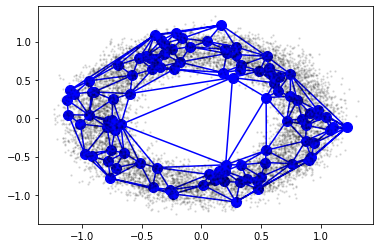

In [35]:
plt.triplot(new_data[sample][:,0],new_data[sample][:,1],tri.simplices,color = "blue")
plt.scatter(new_data[sample][:,0],new_data[sample][:,1],s=100,color = "blue")
plt.scatter(new_data[rem][:,0],new_data[rem][:,1],s=2,alpha=0.1,color='black')

In [52]:
point = data[0][0:dim]
tri.find_simplex(point)

array(174, dtype=int32)

In [127]:
tri.transform[tri.find_simplex(point),:dim].dot(np.transpose(point - tri.transform[tri.find_simplex(point),dim]))

array([0.4893894 , 0.22421225])

In [128]:
s = tri.find_simplex(point)
tri.transform[s, :point.shape[0]].transpose([1, 0])*(point - tri.transform[s, point.shape[0]]).sum(axis=2).T

array([-0.24428852, -0.92681505])

In [123]:
tri.transform[s, point.shape[0]]

array([ 0.73533399, -0.73178601])

In [124]:
tri.transform[tri.find_simplex(point),dim]

array([ 0.73533399, -0.73178601])

In [130]:
np.transpose(point - tri.transform[tri.find_simplex(point),dim])

array([-0.11212675,  0.07147087])

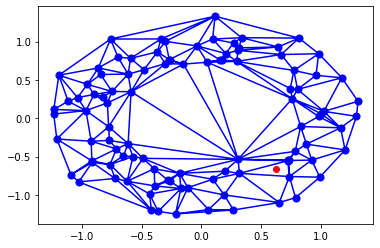

In [53]:
plt.triplot(data[sample][:,0],data[sample][:,1],tri.simplices,color = "blue")
plt.scatter(data[sample][:,0],data[sample][:,1],s=50,color = "blue")
plt.scatter(point[0],point[1],color='r')

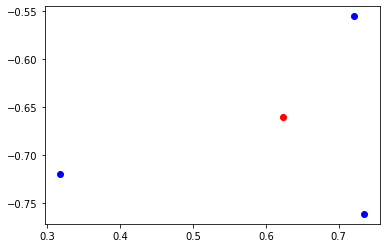

In [56]:
vs = tri.vertices[174]
plt.scatter(point[0],point[1],color='r')
plt.scatter(data[sample[vs[0]]][0],data[sample[vs[0]]][1],color='b')
plt.scatter(data[sample[vs[1]]][0],data[sample[vs[1]]][1],color='b')
plt.scatter(data[sample[vs[2]]][0],data[sample[vs[2]]][1],color='b')


In [138]:
tri.vertices[s]

array([42, 90, 65], dtype=int32)

In [50]:
baricentric

array([[0.30651462, 0.43974525, 0.25374013],
       [0.25969538, 0.45074904, 0.28955559],
       [0.52201566, 0.35806883, 0.11991551],
       ...,
       [0.21891517, 0.75134357, 0.02974127],
       [0.26459741, 0.63873335, 0.09666924],
       [0.79336044, 0.13231214, 0.07432742]])

In [121]:
bc[-1]

array([9.99900000e+03, 1.20000000e+02, 7.93360438e-01, 1.32312145e-01,
       7.43274170e-02])

In [40]:
B = data[:,dim]
A = np.zeros((len(data),len(sample)))
for i in range(len(data)):
    x = bc[i][1:(dim+3)]            #We extract index and barycentric coordinates of the i-th remaining point
    y = tri.vertices[int(x[0])]    #We extract the points of the triangulation containing the i-th remaining point
    for j in range(dim+1):
        A[i][y[j]] = x[j+1]
sol = lsq_linear(A,B,bounds=(0,1),lsq_solver='lsmr')
data[sample][:,dim] = sol['x']

In [39]:
data[sample][:,dim]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0.])

In [41]:
data[sample][:,dim]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0.])

In [118]:
i = 0
tri.simplices[int(bc[i][2:(dim+3)])]

TypeError: only size-1 arrays can be converted to Python scalars

In [97]:
int(bc[i][2:(dim+3)])

TypeError: only size-1 arrays can be converted to Python scalars

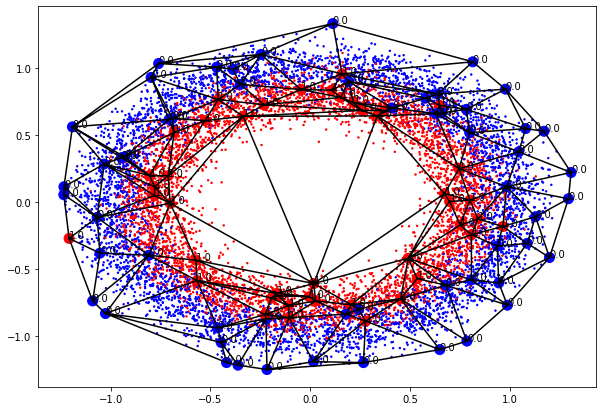

In [19]:
colors_rem = []
for i in range(len(rem)):
    if data[rem[i]][2] >= threshold:
        colors_rem.append('r')
    else:
        colors_rem.append('b')
colors = []
for i in range(len(sample)):
    if data[sample[i]][dim] >= threshold:
        colors.append('r')
    else:
        colors.append('b')
fig2 =  plt.figure(figsize = (10,7))
ax2 = fig2.add_subplot()
ax2.scatter(data[rem][:,0],data[rem][:,1],s=2,color=colors_rem)
ax2.scatter(data[sample][:,0],data[sample][:,1],s=100,color = colors)
ax2.triplot(data[sample][:,0],data[sample][:,1],tri.simplices,color = "black")
for i in range(len(sample)):
    ax2.annotate(str(round(data[sample[i]][dim],2)),[data[sample[i]][0],data[sample[i]][1]])
plt.show()

In [20]:
sample

array([6458, 7036, 5413, 4912, 7352, 6693, 6414, 6721, 7779, 4935, 6091,
       8984, 3028, 2234, 4802, 3548, 1017, 2522, 4172, 4215, 2716, 6311,
       6890,  663, 4242, 8376, 7961, 6634, 4969, 7808, 5866, 9558, 3578,
       8268, 2281, 4617, 2289, 1553, 4104, 8725, 9861, 2407, 5081, 1618,
       1208, 5409, 7735, 9171, 1649, 5796, 7113, 5180, 3350, 9052, 7815,
       7253, 8541, 4267, 1020, 8989,  230, 1528, 6534,   18, 8086, 5458,
       3996, 5328, 1031, 3130, 9298, 3632, 3909, 2334, 8896, 7339, 1494,
       1318, 5243, 8322, 8016, 1786, 4938, 9031, 4769, 2044, 8969, 5451,
       8852, 3329, 9882, 8965, 9627, 4712, 7290, 1501, 9769, 6306, 5194,
       9431])

In [157]:
(A-Af)[3456]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        4.91113611e-09,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -8.60413785e-09,  0.00000000e+00,  3.69300177e-09,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [149]:
A[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.25374013, 0.30651462, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [150]:
Af[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.25374013, 0.30651462, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [154]:
len(Af)

10000